# Plot for Z -> X -> Y: Pairwise Granger Causality

In [89]:
import scipy.io as io
import numpy as np
import collections
import os

gcdir =  'granger-causality/ZactXactY_R/PGC/'
model = 'Z->X->Y'
model_orders = range(1,10)


!ls $gcdir
filelist = [gcdir + 'PGC_p_' + str(i) + "_.mat" for i in model_orders]

matrices_dict = collections.OrderedDict()

for matr_file in filelist:
    mat_dict = io.loadmat(matr_file, appendmat=False)
    matrices_dict[matr_file] = mat_dict[mat_dict.keys()[0]]
    matrices_dict[matr_file][np.where(matrices_dict[matr_file] == 0)] = 1

PGC.R                              PGC_p_6_.mat
PGC_p_1_.csv                       PGC_p_7_.csv
PGC_p_1_.mat                       PGC_p_7_.mat
PGC_p_2_.csv                       PGC_p_8_.csv
PGC_p_2_.mat                       PGC_p_8_.mat
PGC_p_3_.csv                       PGC_p_9_.csv
PGC_p_3_.mat                       PGC_p_9_.mat
PGC_p_4_.csv                       PGCrun.R
PGC_p_4_.mat                       expression_ZXYA_200000_Z->X->Y.mat
PGC_p_5_.csv                       workspace.RData
PGC_p_5_.mat                       workspace_B.RData
PGC_p_6_.csv


Max value is  5


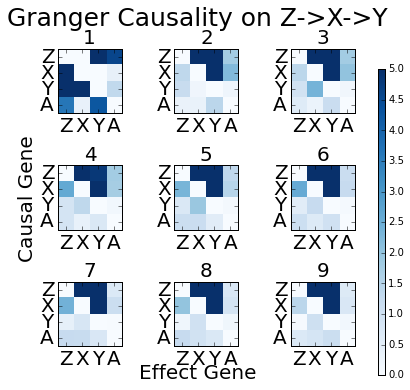

In [90]:
# display the p-values of interactions

import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

classes = ['Z', 'X', 'Y', 'A']
cmap=plt.cm.Blues


max_value = 5 #np.max(-np.log10(np.array(matrices_dict.values())))
print "Max value is ", max_value
min_value = 0


fig = plt.figure(figsize=(5,5))
fig_ax = fig.add_subplot(1,1,1)

fig.text(0.5, 0.00, 'Effect Gene', ha='center', fontsize=20)
fig.text(0.00, 0.5, 'Causal Gene', va='center', rotation='vertical', fontsize=20)
fig.text(0.5, 0.98, 'Granger Causality on ' + str(model), ha='center', fontsize=25)
# plt.ylabel('Cause Gene', fontsize=15)
# plt.xlabel('Effect Gene', fontsize=15)
# plt.title("Granger Causality of " + str(model), fontsize=25)

for i in range(len(model_orders)):
    p = model_orders[i]
    matr_file = matrices_dict.keys()[i]
    
    
    title = str(p)
    
    
    # First normalize into recalls.
    cm = -np.log10(matrices_dict[matr_file])
    
    ax = plt.subplot(3,3, i+1)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap, clim=(0, max_value))
    ax.set_title(title, fontsize=20)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)

    
position = fig.add_axes([1, 0.01, 0.02, 0.85])
# cax, kw = mpl.colorbar.make_axes(fig_ax)

mpl.colorbar.colorbar_factory(position, im)
plt.tight_layout()
plt.show()

# Plot for Z -> X, Z -> Y, pairwise granger causality

In [86]:
import scipy.io as io
import numpy as np
import collections
import os

gcdir =  'granger-causality/ZactX-ZactY_R/PGC/'
model = 'Z->X-Z->Y'
model_orders = range(1,10)


!ls $gcdir
filelist = [gcdir + 'PGC_p_' + str(i) + "_.mat" for i in model_orders]

matrices_dict = collections.OrderedDict()

for matr_file in filelist:
    mat_dict = io.loadmat(matr_file, appendmat=False)
    matrices_dict[matr_file] = mat_dict[mat_dict.keys()[0]]
    matrices_dict[matr_file][np.where(matrices_dict[matr_file] == 0)] = 1

PGC.R                                PGC_p_6_.mat
PGC_p_1_.mat                         PGC_p_7_.mat
PGC_p_2_.mat                         PGC_p_8_.mat
PGC_p_3_.mat                         PGC_p_9_.mat
PGC_p_4_.mat                         PGCrun.R
PGC_p_5_.mat                         expression_ZXYA_200000_Z->X-Z->Y.mat


Max value is  5


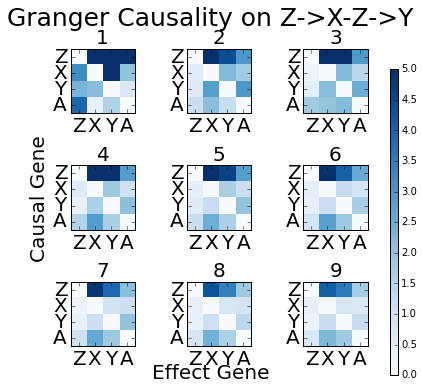

In [88]:
# display the p-values of interactions

import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

classes = ['Z', 'X', 'Y', 'A']
cmap=plt.cm.Blues


max_value = 5#np.max(-np.log10(np.array(matrices_dict.values())))
print "Max value is ", max_value
min_value = 0


fig = plt.figure(figsize=(5,5))
fig_ax = fig.add_subplot(1,1,1)

fig.text(0.5, 0.00, 'Effect Gene', ha='center', fontsize=20)
fig.text(0.00, 0.5, 'Causal Gene', va='center', rotation='vertical', fontsize=20)
fig.text(0.5, 0.98, 'Granger Causality on ' + str(model), ha='center', fontsize=25)
# plt.ylabel('Cause Gene', fontsize=15)
# plt.xlabel('Effect Gene', fontsize=15)
# plt.title("Granger Causality of " + str(model), fontsize=25)

for i in range(len(model_orders)):
    p = model_orders[i]
    matr_file = matrices_dict.keys()[i]
    
    
    title = str(p)
    
    
    # First normalize into recalls.
    cm = -np.log10(matrices_dict[matr_file])
    
    ax = plt.subplot(3,3, i+1)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap, clim=(0, max_value))
    ax.set_title(title, fontsize=20)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)

    
position = fig.add_axes([1, 0.01, 0.02, 0.85])
# cax, kw = mpl.colorbar.make_axes(fig_ax)

mpl.colorbar.colorbar_factory(position, im)
plt.tight_layout()
plt.show()

# Plot for Z -> X -> Y: lasso regression

In [91]:
import scipy.io as io
import numpy as np
import collections
import os

gcdir =  'granger-causality/ZactXactY_R/Lasso/'
prefix = 'expression_ZXYA_200000_'+ model + ".mat"
model = 'Z->X->Y'
model_lams = [10, 1, 0.1, 0.01]


!ls $gcdir
filelist = [gcdir + prefix + "_lasso_B_" + str(i) + "_.mat" for i in model_lams]

matrices_dict = collections.OrderedDict()

for matr_file in filelist:
    mat_dict = io.loadmat(matr_file, appendmat=False)
    matrices_dict[matr_file] = mat_dict[mat_dict.keys()[0]]
    matrices_dict[matr_file][np.where(matrices_dict[matr_file] == 0)] = 1

expression_ZXYA_200000_Z->X->Y.mat
expression_ZXYA_200000_Z->X->Y.mat_lasso_B_0.001_.mat
expression_ZXYA_200000_Z->X->Y.mat_lasso_B_0.01_.mat
expression_ZXYA_200000_Z->X->Y.mat_lasso_B_0.1_.mat
expression_ZXYA_200000_Z->X->Y.mat_lasso_B_10_.mat
expression_ZXYA_200000_Z->X->Y.mat_lasso_B_1_.mat
expression_ZXYA_200000_Z->X->Y.mat_lasso_B_1e-04_.mat
filter_norm_expression.mat
filter_norm_expression.mat_lasso_B_0.001_.mat
filter_norm_expression.mat_lasso_B_0.01_.mat
filter_norm_expression.mat_lasso_B_0.1_.mat
filter_norm_expression.mat_lasso_B_1_.mat
filter_norm_expression.mat_lasso_B_1e-04_.mat
glmnet_lasso.R
run.R
workspace.RData
workspace_B.RData


In [ ]:
# display the p-values of interactions

import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

classes = ['Z', 'X', 'Y', 'A']
cmap=plt.cm.Blues


max_value = 3#np.max(-np.log10(np.array(matrices_dict.values())))
print "Max value is ", max_value
min_value = -3


fig = plt.figure(figsize=(5,5))
# fig_ax = fig.add_subplot(1,1,1)

# fig.text(0.5, 0.00, 'Effect Gene', ha='center', fontsize=20)
# fig.text(0.00, 0.5, 'Causal Gene', va='center', rotation='vertical', fontsize=20)
# fig.text(0.5, 0.98, 'Granger Causality on ' + str(model), ha='center', fontsize=25)
# plt.ylabel('Cause Gene', fontsize=15)
# plt.xlabel('Effect Gene', fontsize=15)
# plt.title("Granger Causality of " + str(model), fontsize=25)

for i in range(len(model_lams)):
    p = model_orders[i]
    matr_file = matrices_dict.keys()[i]
    
    
    title = str(p)
    
    
    # First normalize into recalls.
    cm = -np.log10(matrices_dict[matr_file])
    
    ax = plt.subplot(3,3, i+1)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap, clim=(0, max_value))
    ax.set_title(title, fontsize=20)
    tick_marks = np.arange(len(classes))
    lag_tick_marks = np.arange()
    
    
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)

    
position = fig.add_axes([1, 0.01, 0.02, 0.85])
# cax, kw = mpl.colorbar.make_axes(fig_ax)

mpl.colorbar.colorbar_factory(position, im)
plt.tight_layout()
plt.show()